# Desafio 

Nessa sprint, o desafio gira em torno de utiliar as bibliotecas 'pandas' e 'matplotlib' para extração e geração de gráficos a partir do csv 'googleplaystore.csv' que nos foi disponibilizado.

# Etapa 1 - Preparando o ambiente

# Importando bibliotecas, lendo o csv e removendo duplicações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('~/Downloads/googleplaystore.csv')
df_sem_duplicatas = df.drop_duplicates()



# ETAPA 2 - Grafico do TOP 5

* Primeiro faço a remoção dos caracteres indesejados na coluna 'Installs', faço uso do .loc pois facilita bastante acessar todas as linhas na coluna 'Installs' do DataFrame df_sem_duplicatas
* Conversão da Coluna 'Installs' para Valores Numéricos com 'pd.to_numeric' e qualquer valor que não puder ser convertido é transformado em NaN, usando o parâmetro errors='coerce'
* Remoção de Linhas com Valores NaN em 'Installs' com o 'dropna'
* Converte os valores da coluna 'Installs' para int, garantindo que a coluna é do tipo inteiro, o que é necessário para funções como nlargest. 
* Cria um gráfico de barras, com os aplicativos (top5['App']) no eixo x e o número de instalações (top5['Installs']) no eixo y. As barras são coloridas de azul claro.


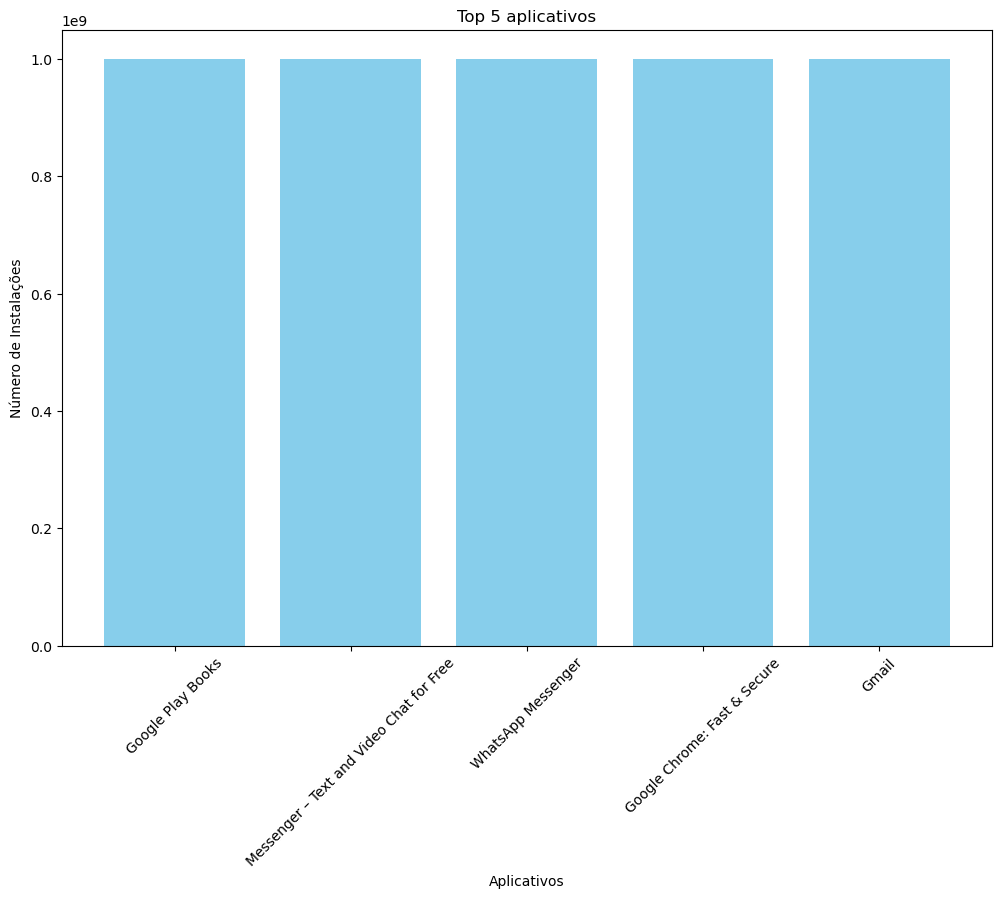

In [ ]:
df_sem_duplicatas.loc[:, 'Installs'] = (df_sem_duplicatas['Installs']
                                         .replace('[+,]', '', regex=True)  
                                         .replace('Free', '0'))  


df_sem_duplicatas.loc[:, 'Installs'] = pd.to_numeric(df_sem_duplicatas['Installs'], errors='coerce')


df_sem_duplicatas = df_sem_duplicatas.dropna(subset=['Installs'])


df_sem_duplicatas['Installs'] = df_sem_duplicatas['Installs'].astype(int)

top5 = df_sem_duplicatas.nlargest(5, 'Installs')  

plt.figure(figsize=(12, 8))
plt.bar(top5['App'], top5['Installs'], color='skyblue')
plt.xlabel("Aplicativos")
plt.ylabel("Número de Instalações")
plt.title("Top 5 aplicativos")
plt.xticks(rotation=45)
plt.show()

# ETAPA 3 - Grafico de Pizza

* Faço a contagem de ocorrências das categorias com o 'value_counts'
* utilizo o 'pie' para criar o grafico de pizza
* 'autopct' para determinar a quantidade de decimais que as porcentagens terão, e o 'starangle' para ditar o ângulo de inicio do gráfico 
* '.axis' permite que o gráfico fique mais proporcional

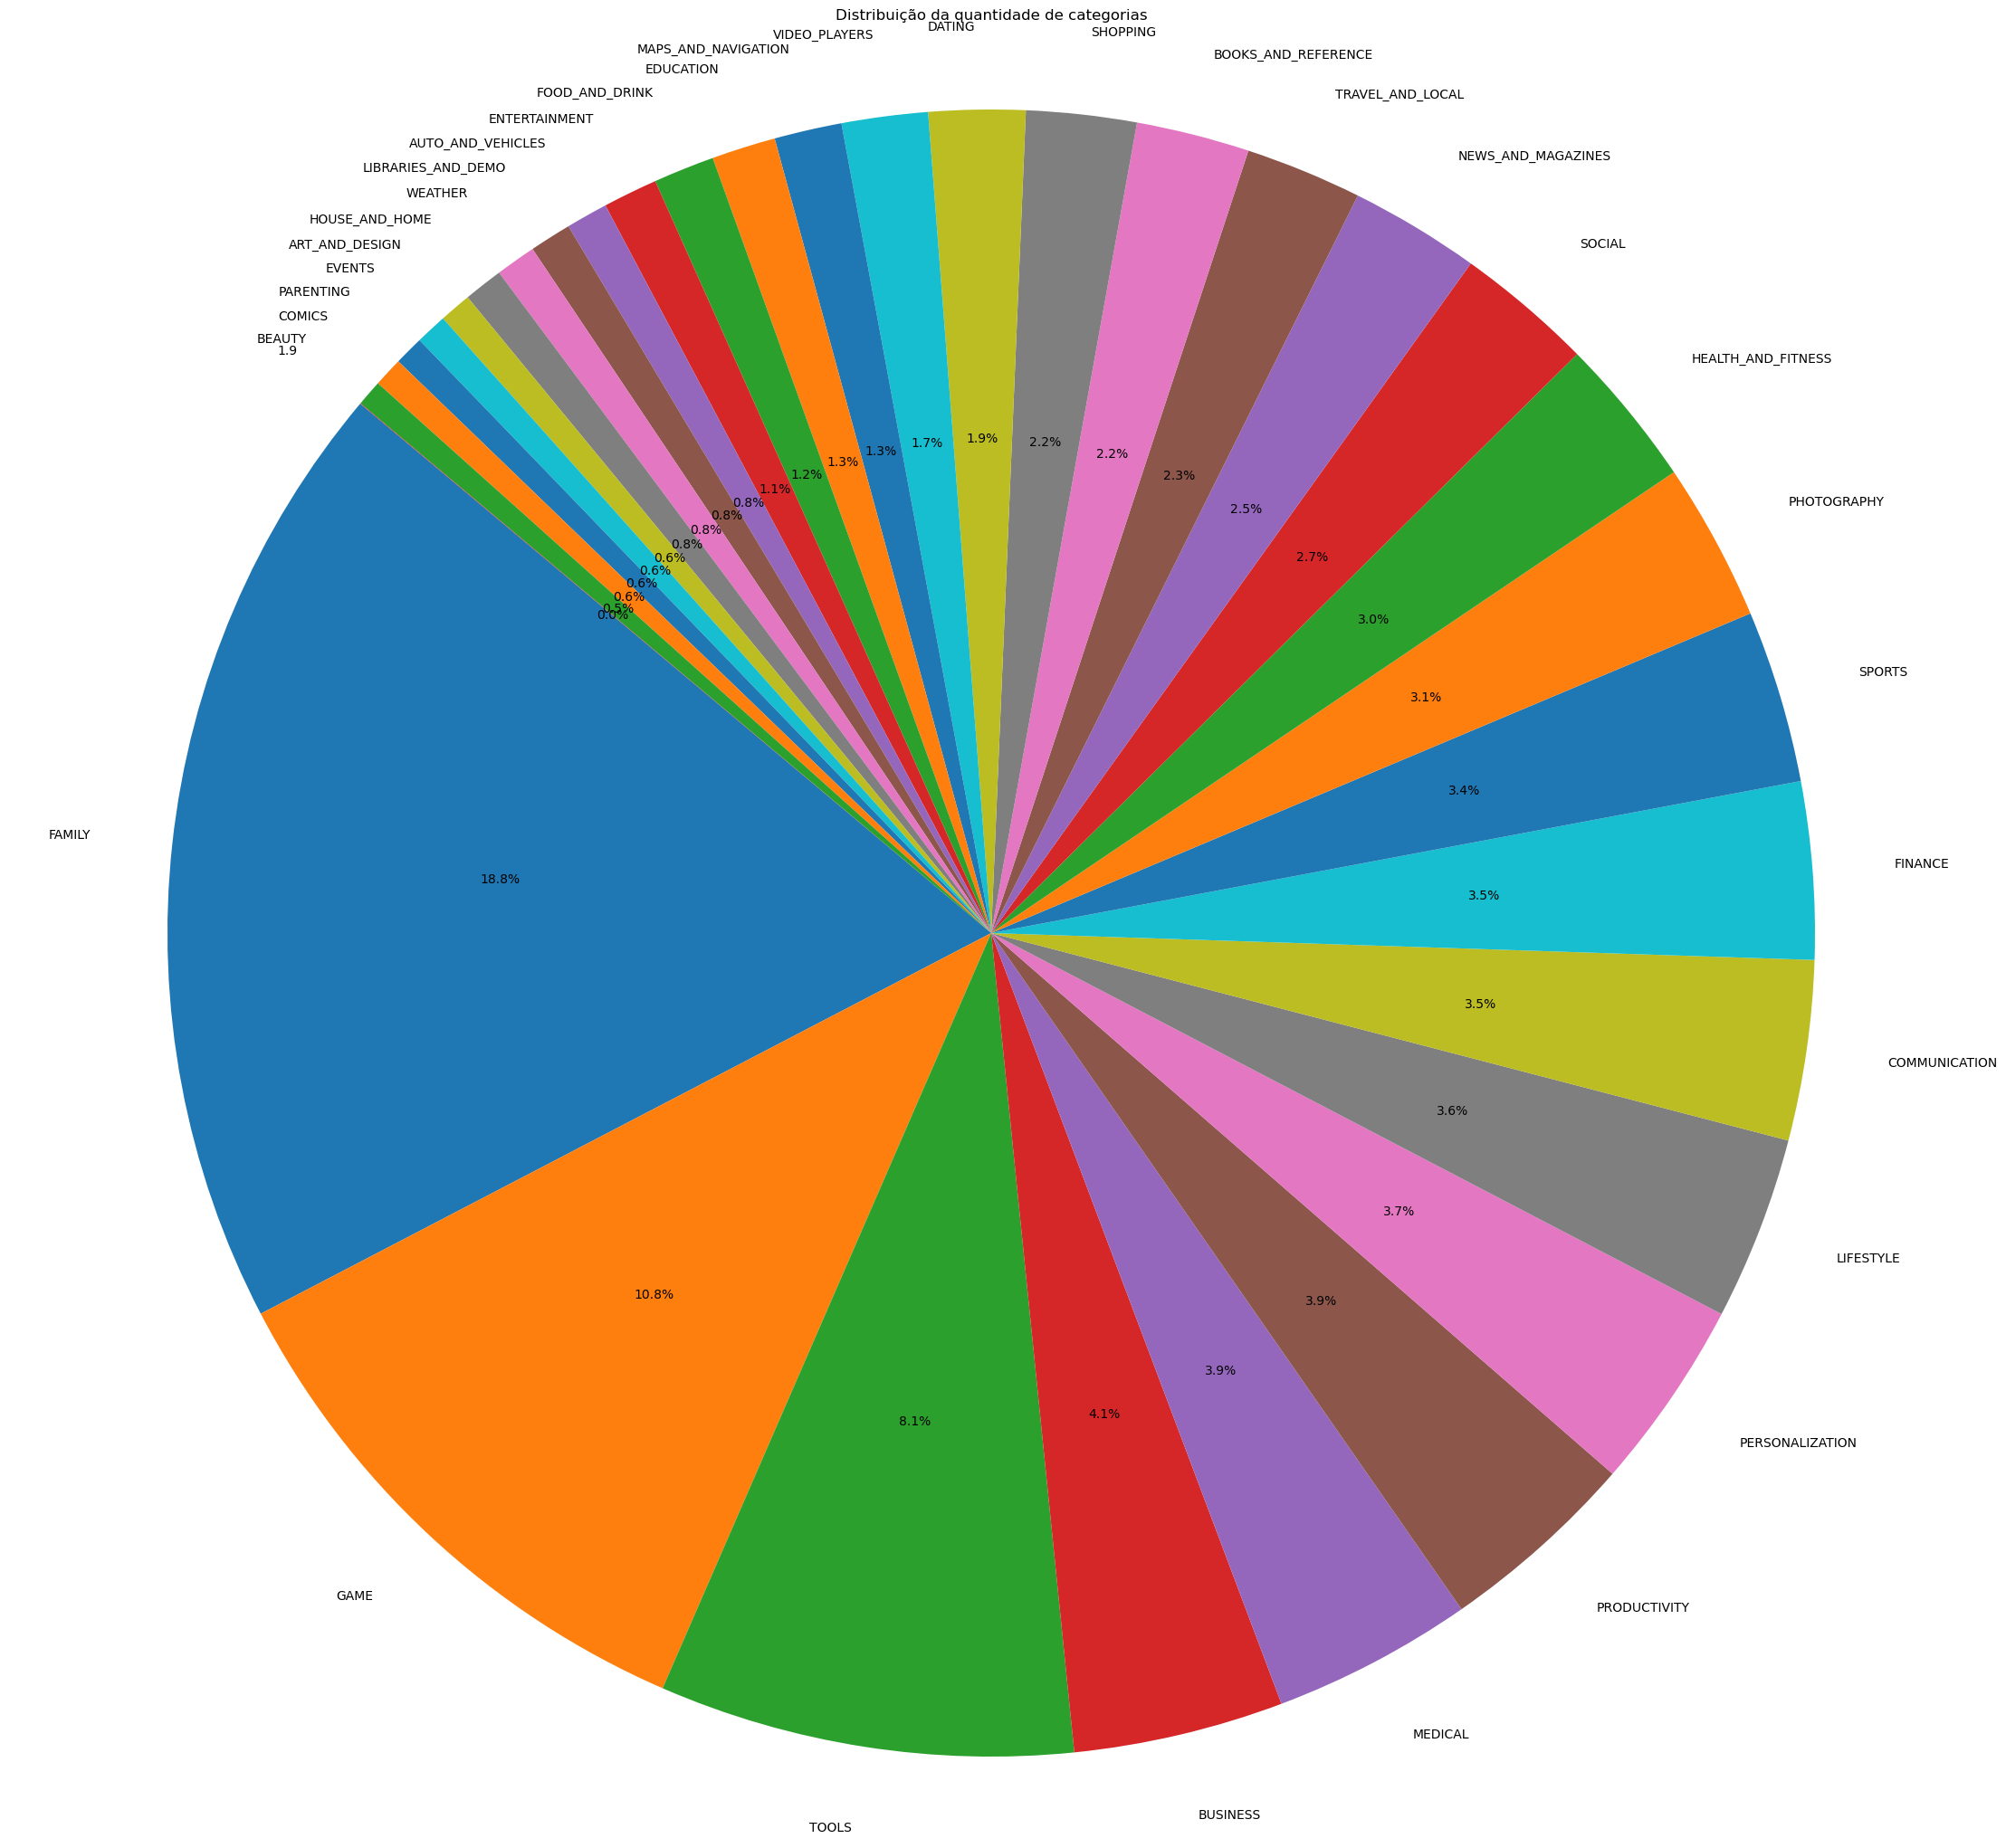

In [ ]:
qntcategorias = df_sem_duplicatas['Category'].value_counts()

plt.figure(figsize=(28, 26))
plt.pie(qntcategorias, labels=qntcategorias.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribuição da quantidade de categorias")
plt.axis('equal')  
plt.show()

# ETAPA 4 - Item mais caro

* Uso o idxmax para procurar o indice maximo da coluna Price

In [ ]:

df_sem_duplicatas['Price'] = df_sem_duplicatas['Price'].replace({'\$': '', 'Free': '0'}, regex=True)
df_sem_duplicatas['Price'] = pd.to_numeric(df_sem_duplicatas['Price'], errors='coerce')

df_sem_duplicatas = df_sem_duplicatas.dropna(subset=['Price'])

maiscaro = df_sem_duplicatas.loc[df_sem_duplicatas['Price'].idxmax()]

print("App Mais caro:")
print(f"Nome do app: {maiscaro['App']}")
print(f"Preco: ${maiscaro['Price']}")

App Mais caro:
Nome do app: I'm Rich - Trump Edition
Preco: $400.0


# ETAPA 5 - Quantos Apps qualificados "mature +17"

* Crio um filtro que seleciona somente as linhas onde a coluna 'Content Rating' tem o valor 'Mature 17+'
* .shape é um atributo que retorna uma tupla com o número de linhas e colunas do data frame, o '[0]' pega o primeiro elemento da tupla, que nos dá a contagem de aplicativos que atendem o criterio.

In [ ]:
qntappsmature = df_sem_duplicatas[df_sem_duplicatas['Content Rating'] == 'Mature 17+'].shape[0]

print(f"Número de apps classificados como 'Mature 17+': {qntappsmature}")

Número de apps classificados como 'Mature 17+': 447


# ETAPA 6 - Top 10 apps Review

* Selecionar os 10 aplicativos com o maior número de avaliações, sem duplicatas de nome

In [ ]:
df_sem_duplicatas['Reviews'] = pd.to_numeric(df_sem_duplicatas['Reviews'].str.replace(r'[\D]','', regex=True), errors='coerce')

df_unique_apps = df_sem_duplicatas.sort_values(by='Reviews', ascending=False).drop_duplicates(subset='App')

# Selecionar os 10 aplicativos com o maior número de avaliações, sem duplicatas de nome
top10apps_reviews = df_unique_apps.head(10)

# Exibir o resultado com apenas nome do app e número de avaliações
resultado = top10apps_reviews[['App', 'Reviews']]

resultado

,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2604,Instagram,66577446
382,Messenger – Text and Video Chat for Free,56646578
1879,Clash of Clans,44893888
4005,Clean Master- Space Cleaner & Antivirus,42916526
1872,Subway Surfers,27725352
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1878,Clash Royale,23136735


# ETAPA 7 - Calculos

## Top 10 apps por rating

In [ ]:
top10appsrating = df_sem_duplicatas.nlargest(10, 'Rating')
resultadotop10 = top10appsrating[['App','Rating']]

resultadotop10

,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
640,Online Girls Chat Group,5.0
654,Speeding Joyride & Car Meet App,5.0
1028,SUMMER SONIC app,5.0
1030,Prosperity,5.0
1038,Mindvalley U Tallinn 2018,5.0


## App com mais reviews

In [ ]:
appmaisreviews = df_sem_duplicatas.nlargest(1,'Reviews')
resultado_app_reviews = appmaisreviews[['App','Reviews']]

resultado_app_reviews

,App,Reviews
2544,Facebook,78158306


# Etapa 8 - Gráfico de linha e dispersão

* Devemos criar 2 gráficos de algum indicador do dataset, farei com o rating medio das categorias e um de relacionar a coluna de instalações com a de rating.

## Gráfico de linha

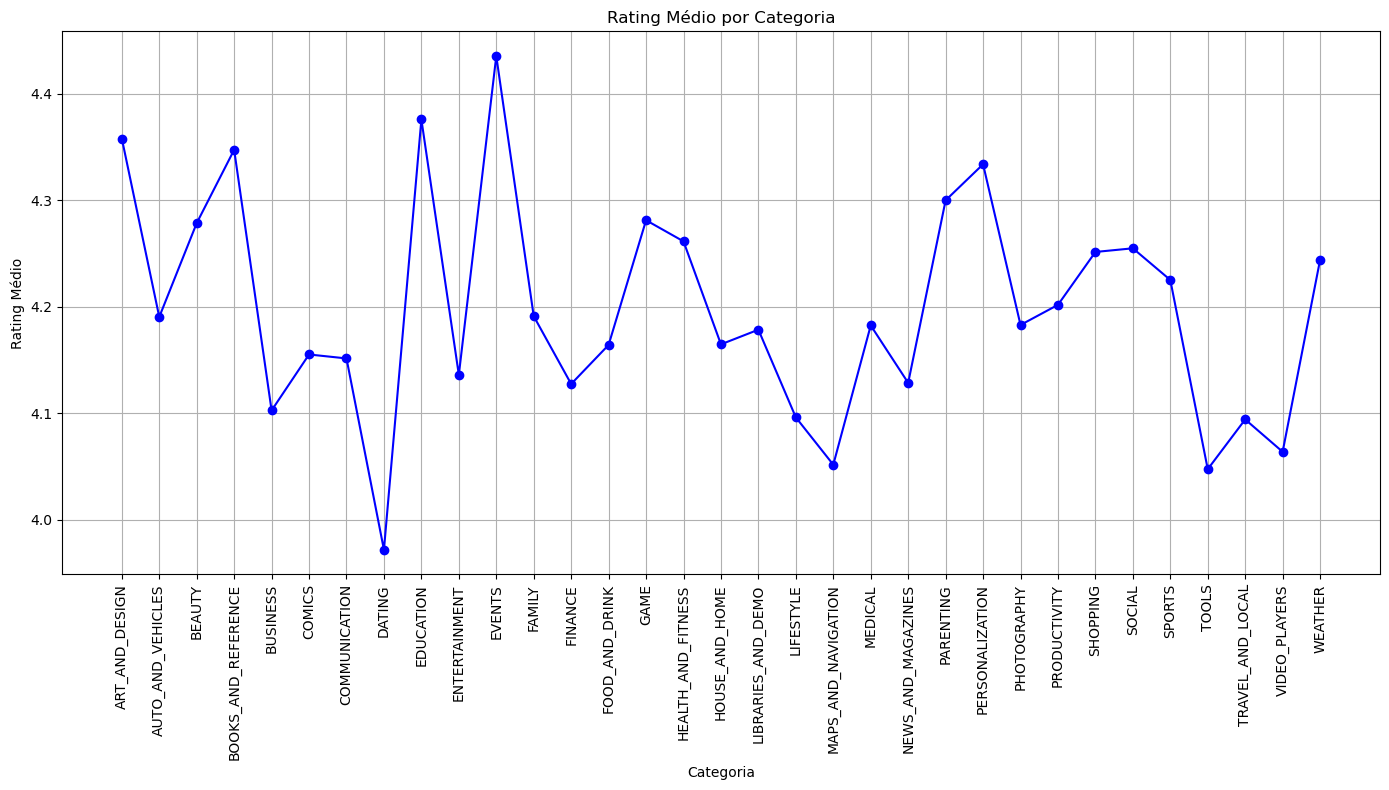

In [ ]:
rating_por_categoria = df_sem_duplicatas.groupby('Category')['Rating'].mean()

plt.figure(figsize=(14,8))
plt.plot(rating_por_categoria.index, rating_por_categoria.values, color= 'blue', marker='o')
plt.xlabel('Categoria')
plt.ylabel('Rating Médio')
plt.title('Rating Médio por Categoria')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de dispersão

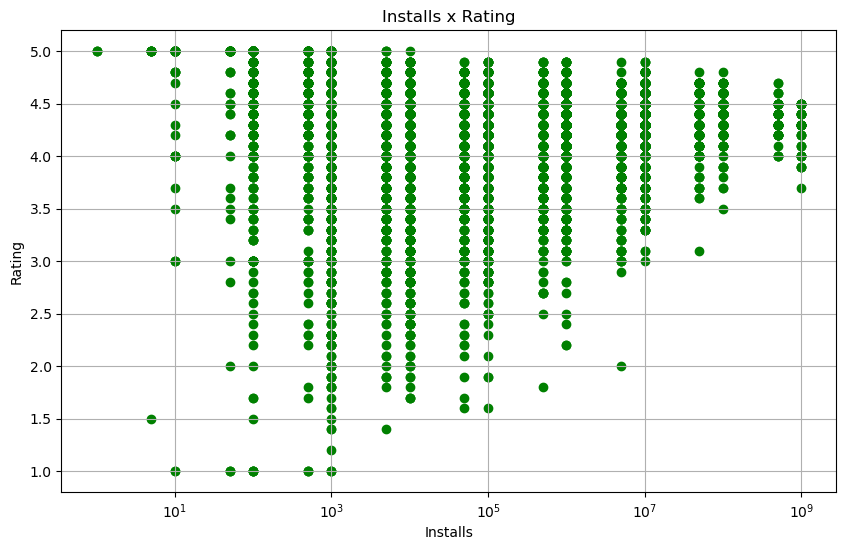

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_sem_duplicatas['Installs'], df_sem_duplicatas['Rating'], color = 'green')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Installs x Rating')
plt.xscale('log')
plt.grid(True)
plt.show()